In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

### FitzHugh-Nagumo

In [4]:
# define FitzHugh-Nagumo model dynamic
def FN(y, t, a, b, c):
	V, R = y
	dVdt = c * (V - np.power(V,3)/3.0 + R)
	dRdt = -1./c * (V - a + b*R)
	return (dVdt,dRdt)

In [13]:
# model parameters 
a, b, c = 0.2, 0.2, 3
# initial condition
V0 = -5
R0 = 5
y0 = V0, R0
# time point for evaluation
t = np.linspace(0, 40, 1281)
# integration
x = odeint(FN, y0, t, args = (a,b,c))

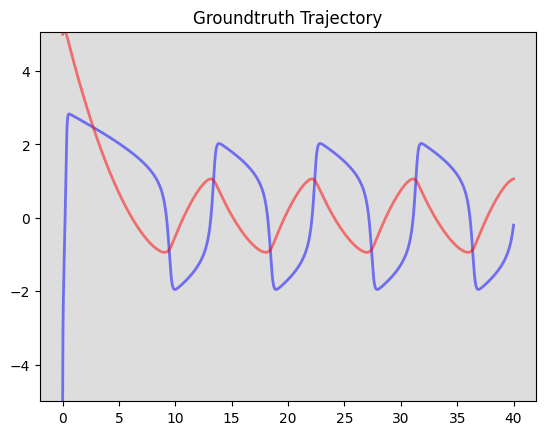

In [14]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, x[:,0], 'b', alpha=0.5, lw=2, label='V')
ax.plot(t, x[:,1], 'r', alpha=0.5, lw=2, label='R')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(np.min(x),np.max(x))
plt.title('Groundtruth Trajectory')
plt.show()

In [ ]:
# store data
np.savetxt('fn.txt', np.hstack((t.reshape(-1,1),x)), delimiter='\t')

### Lotka-Volterra

In [17]:
# define Lotka-Volterra model dynamic
def LV(y, t, a, b, c, d):
	P, D = y # Prey, Predator
	dPdt = a * P - b * P * D
	dDdt = c * P * D - d * D
	return (dPdt,dDdt)

In [20]:
# model parameters
a, b, c, d = 1.5, 1, 1, 3
# initial condition
P0, D0 = 5, 0.2 
y0 = P0, D0
# time point for evaluation
t = np.linspace(0, 16, 1281)
# integration
x = odeint(LV, y0, t, args = (a,b,c,d))
x = np.log(x)

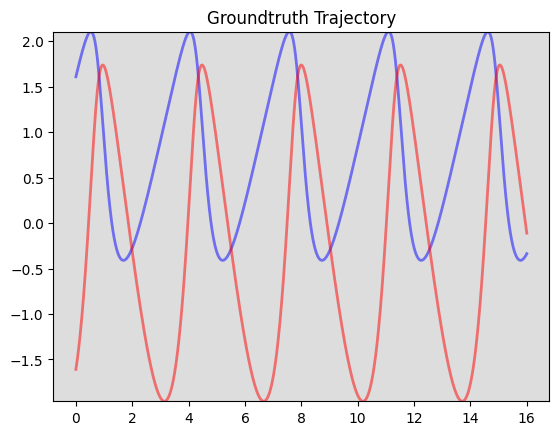

In [21]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, x[:,0], 'b', alpha=0.5, lw=2, label='V')
ax.plot(t, x[:,1], 'r', alpha=0.5, lw=2, label='R')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(np.min(x),np.max(x))
plt.title('Groundtruth Trajectory')
plt.show()

In [ ]:
# store data
np.savetxt('lv.txt', np.hstack((t.reshape(-1,1),x)), delimiter='\t')

### Hes1

In [22]:
# define Hes1 model dynamic
def fOde(y, t, a, b, c, d, e, f, g):
	P, M, H = y
	dPdt = -a*P*H + b*M - c*P
	dMdt = -d*M + e/(1+np.power(P,2))
	dHdt = -a*P*H + f/(1+np.power(P,2)) - g*H
	return (dPdt,dMdt,dHdt)

In [23]:
# model parameters
a, b, c, d, e, f, g = 0.022, 0.3, 0.031, 0.028, 0.5, 20, 0.3
# initial condition
P0, M0, R0 = 1.438575, 2.037488, 17.90385
y0 = P0, M0, R0
# time point for evaluation
t = np.linspace(0, 500, 1281)
# integration 
x = odeint(fOde, y0, t, args = (a,b,c,d,e,f,g))
x = np.log(x)

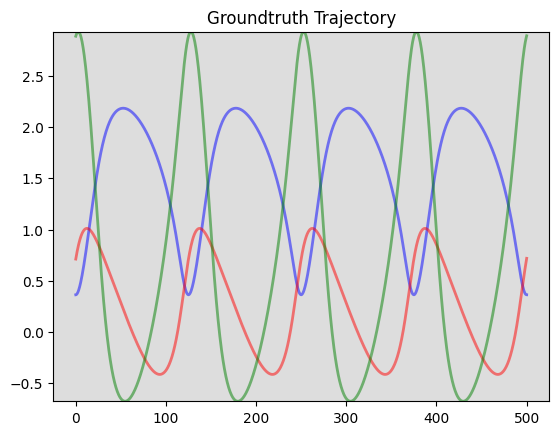

In [24]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, x[:,0], 'b', alpha=0.5, lw=2, label='P')
ax.plot(t, x[:,1], 'r', alpha=0.5, lw=2, label='M')
ax.plot(t, x[:,2], 'g', alpha=0.5, lw=2, label='H')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(np.min(x),np.max(x))
plt.title('Groundtruth Trajectory')
plt.show()

In [ ]:
# store data
np.savetxt('lv.txt', np.hstack((t.reshape(-1,1),x)), delimiter='\t')

### Lorenz 96
See https://en.wikipedia.org/wiki/Lorenz_96_model and https://arxiv.org/pdf/2211.01554.pdf

In [29]:
def L96(y, t, F):
    """Lorenz 96 model with constant forcing"""
    N = y.size
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (y[(i + 1) % N] - y[i - 2]) * y[i - 1] - y[i] + F
    return d

In [30]:
# model parameters
F = 8
# initial conditions
y0 = F * np.ones(5)  # Initial state (equilibrium)
y0[0] += 0.01  # Add small perturbation to the first variable
# time point for evaluation
t = np.linspace(0.0, 8.0, 1281)
# integration 
x = odeint(L96, y0, t, args=(F,))

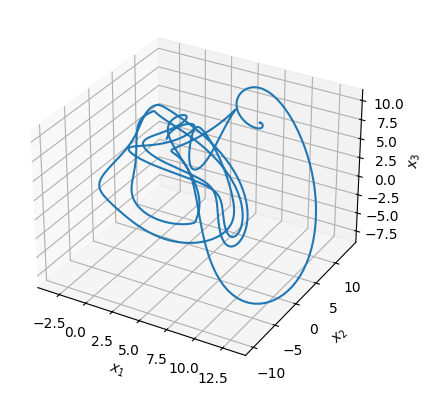

In [31]:
# Plot the first three variables
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

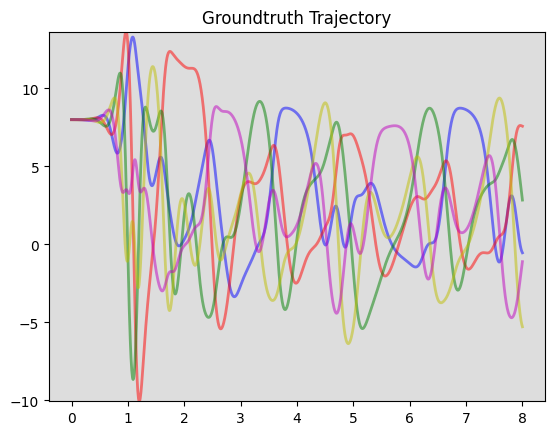

In [32]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, x[:,0], 'b', alpha=0.5, lw=2)
ax.plot(t, x[:,1], 'r', alpha=0.5, lw=2)
ax.plot(t, x[:,2], 'g', alpha=0.5, lw=2)
ax.plot(t, x[:,3], 'y', alpha=0.5, lw=2)
ax.plot(t, x[:,4], 'm', alpha=0.5, lw=2)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(np.min(x),np.max(x))
plt.title('Groundtruth Trajectory')
plt.show()

In [16]:
# store data
np.savetxt('lorenz96.txt', np.hstack((t.reshape(-1,1),x)), delimiter='\t')

More ODE benchmark problems please find it @ http://verivital.com/hyst/benchmark-nonlinear/sogokon2016arch_submission.pdf and http://proceedings.mlr.press/v80/heinonen18a/heinonen18a.pdf